# Credit Card Eligibility Analysis

## Project done by:
### Kirti , Ujjwal Singh


In [1]:
## importing important python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score, recall_score,confusion_matrix,f1_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Load the dataset
df=pd.read_csv("dataset.csv")

In [3]:
## viewing first five row of dataset
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


The Credit Card Data contains these columns
1. ID: An identifier for each individual (customer).

2. Gender: The gender of the individual.

3. Own_car: A binary feature indicating whether the individual owns a car.

4. Own_property: A binary feature indicating whether the individual owns a property.

5. Work_phone: A binary feature indicating whether the individual has a work phone.

6. Phone: A binary feature indicating whether the individual has a phone.

7. Email: A binary feature indicating whether the individual has provided an email address.

8. Unemployed: A binary feature indicating whether the individual is unemployed.

9. Num_children: The number of children the individual has.

10. Num_family: The total number of family members.

11.  Account_length: The length of the individual's account with a bank or financial institution.

12. Total_income: The total income of the individual.

13. Age: The age of the individual.

14. Years_employed: The number of years the individual has been employed.

15. Income_type: The type of income (e.g., employed, self-employed, etc.).

16. Education_type: The education level of the individual.

17. Family_status: The family status of the individual.

18. Housing_type: The type of housing the individual lives in.

19. Occupation_type: The type of occupation the individual is engaged in.

20. Target: The target variable for the classification task, which indicates whether the individual is eligible for a                   credit card or not (e.g., Yes/No, 1/0).

In [4]:
## Checking number of rows and columns
df.shape

(9709, 20)

In [5]:
## viweing columns name
df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone',
       'Email', 'Unemployed', 'Num_children', 'Num_family', 'Account_length',
       'Total_income', 'Age', 'Years_employed', 'Income_type',
       'Education_type', 'Family_status', 'Housing_type', 'Occupation_type',
       'Target'],
      dtype='object')

In [6]:
## checking there is any null value in dataset
df.isnull().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

In [7]:
## Viewing informationn of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [8]:
## Viweing descriptive analysis on numerical column
df.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [9]:
## droping irrevelant columns
df=df.drop(["ID","Phone","Email","Num_family","Unemployed"], axis=1)

In [10]:
df.head()

,Gender,Own_car,Own_property,Work_phone,Num_children,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,1,1,1,0,0,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,0,0,1,0,0,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,0,0,1,0,0,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,1,1,1,1,0,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


## Exploraatory Data Analysis

In [11]:
## calculating the gender proportion
gender_count=df["Gender"].value_counts()
gender_count
male_count=gender_count[1]
female_count=gender_count[0]
print(f"Total Males: {male_count}")
print(f"Total Females: {female_count}")

Total Males: 3386
Total Females: 6323


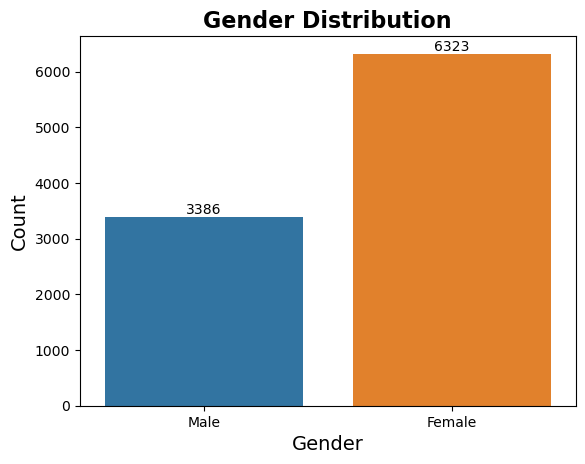

In [12]:
ax=sns.barplot(x=["Male","Female"], y=[male_count, female_count])
plt.title("Gender Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
for bar in ax.containers:
    ax.bar_label(bar)
plt.savefig("gender distribution")

In [13]:
## Calculating Car distribution
car_count=df["Own_car"].value_counts()
own_car=car_count[1]
no_car=car_count[0]
print(f"Have car: {own_car}")
print(f"Does not have car: {no_car}")

Have car: 3570
Does not have car: 6139


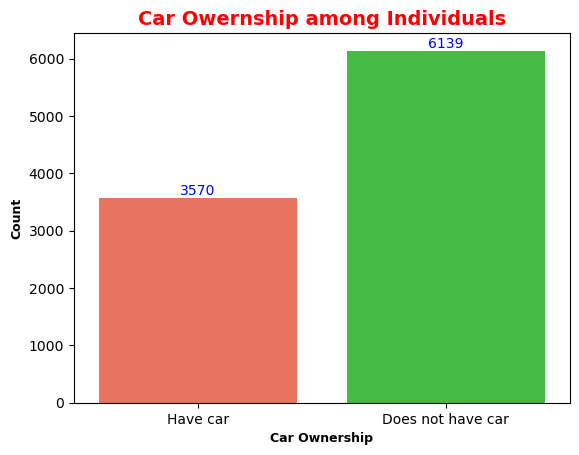

In [14]:
sns.set_palette(["#FF6347","#32CD32"])
ax=sns.barplot(x=["Have car", "Does not have car"], y=[own_car, no_car])
for bar in ax.containers:
    ax.bar_label(bar, color='blue')
plt.title("Car Owernship among Individuals", fontsize=14, fontweight='bold', color='red')
plt.xlabel("Car Ownership", fontsize=9, fontweight='bold')
plt.ylabel("Count",fontsize=9, fontweight='bold' )
plt.savefig("Car Ownership")

from above we can see that most individuals does not have car

In [15]:
## Analyse the car ownership effect the credit car eligibility
car_ownership_eligible = df[df['Target'] == 1]['Own_car'].value_counts()
car_ownership_not_eligible = df[df['Target'] == 0]['Own_car'].value_counts()

print("Car Ownership and Credit Card Eligibility:")
print(f"Eligible for a Credit Card:\n{car_ownership_eligible}")
print(f"\nNot Eligible for a Credit Card:\n{car_ownership_not_eligible}")

Car Ownership and Credit Card Eligibility:
Eligible for a Credit Card:
Own_car
0    822
1    461
Name: count, dtype: int64

Not Eligible for a Credit Card:
Own_car
0    5317
1    3109
Name: count, dtype: int64


In [16]:
## Calculating Property Owernship
property_counts=df["Own_property"].value_counts()
own_property_count=property_counts[1]
no_property_count=property_counts[0]
print(f"Own Property: {own_property_count}")
print(f"No Own Property: {no_property_count}")

Own Property: 6520
No Own Property: 3189


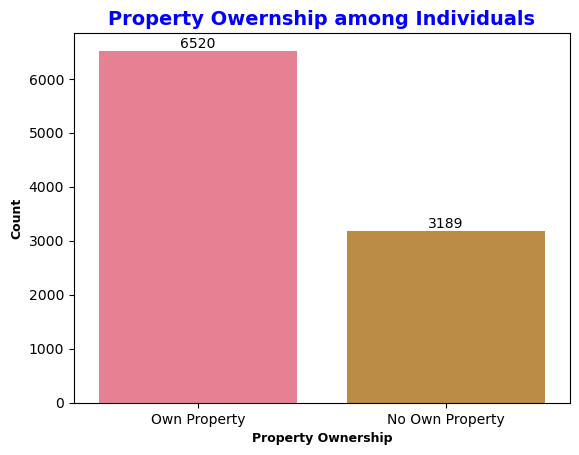

In [17]:
sns.set_palette("husl",8)
ax=sns.barplot(x=["Own Property", "No Own Property"], y=[own_property_count, no_property_count])
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Property Owernship among Individuals", fontsize=14, fontweight='bold', color='blue')
plt.xlabel("Property Ownership", fontsize=9, fontweight='bold')
plt.ylabel("Count",fontsize=9, fontweight='bold' )
plt.savefig("Property Ownership")

In [18]:
## Analyse the property ownership effect the credit property eligibility
property_ownership_eligible = df[df['Target'] == 1]['Own_property'].value_counts()
property_ownership_not_eligible = df[df['Target'] == 0]['Own_property'].value_counts()

print("Property Ownership and Credit Card Eligibility:")
print(f"Eligible for a Credit Card:\n{property_ownership_eligible}")
print(f"\nNot Eligible for a Credit Card:\n{property_ownership_not_eligible}")

Property Ownership and Credit Card Eligibility:
Eligible for a Credit Card:
Own_property
1    818
0    465
Name: count, dtype: int64

Not Eligible for a Credit Card:
Own_property
1    5702
0    2724
Name: count, dtype: int64


In [19]:
## Calculating number of children individual have
num_children_count=df["Num_children"].value_counts().sort_index()
num_children_count

Num_children
0     6819
1     1886
2      852
3      126
4       18
5        5
7        1
14       1
19       1
Name: count, dtype: int64

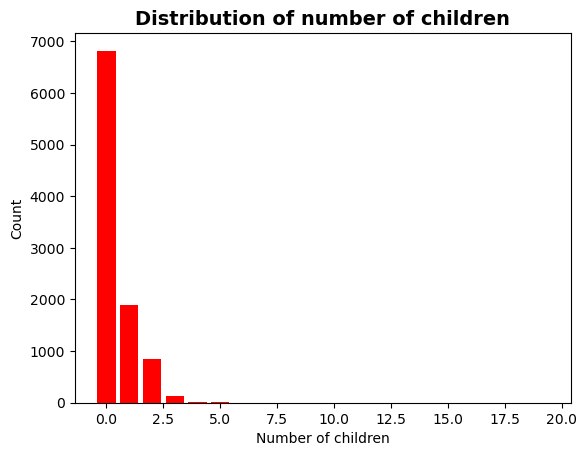

In [20]:
ax=plt.bar(num_children_count.index, num_children_count.values, color="red")
plt.title("Distribution of number of children", fontsize=14, fontweight='bold')
plt.xlabel("Number of children")
plt.ylabel("Count")
plt.savefig("Number of children")

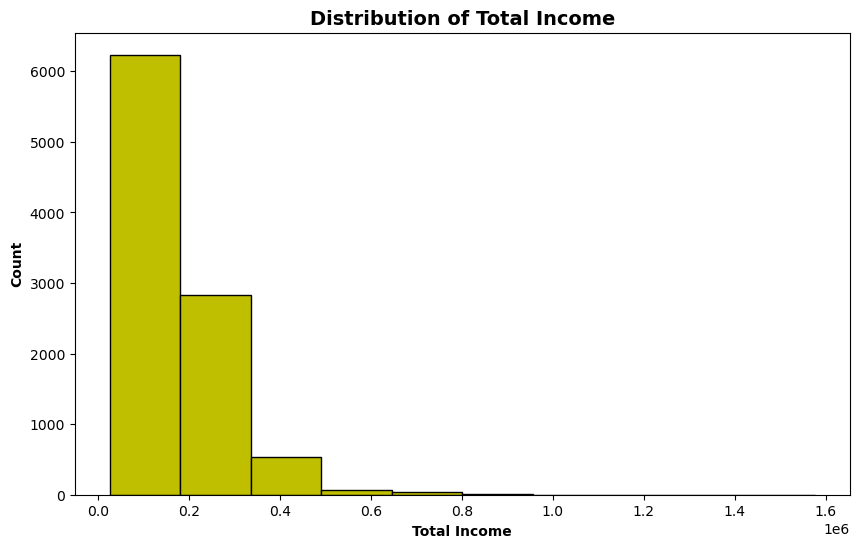

In [21]:
## income distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Total_income'], bins=10, color='y', edgecolor='black')
plt.title('Distribution of Total Income', fontsize=14, fontweight='bold')
plt.xlabel('Total Income', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.savefig("Total income")

In [22]:
## Calculating Occupation Type
occupation_type=df["Occupation_type"].value_counts()
occupation_type

Occupation_type
Other                    2994
Laborers                 1724
Sales staff               959
Core staff                877
Managers                  782
Drivers                   623
High skill tech staff     357
Accountants               300
Medicine staff            291
Cooking staff             193
Security staff            182
Cleaning staff            146
Private service staff      86
Low-skill Laborers         53
Secretaries                46
Waiters/barmen staff       40
HR staff                   22
IT staff                   18
Realty agents              16
Name: count, dtype: int64

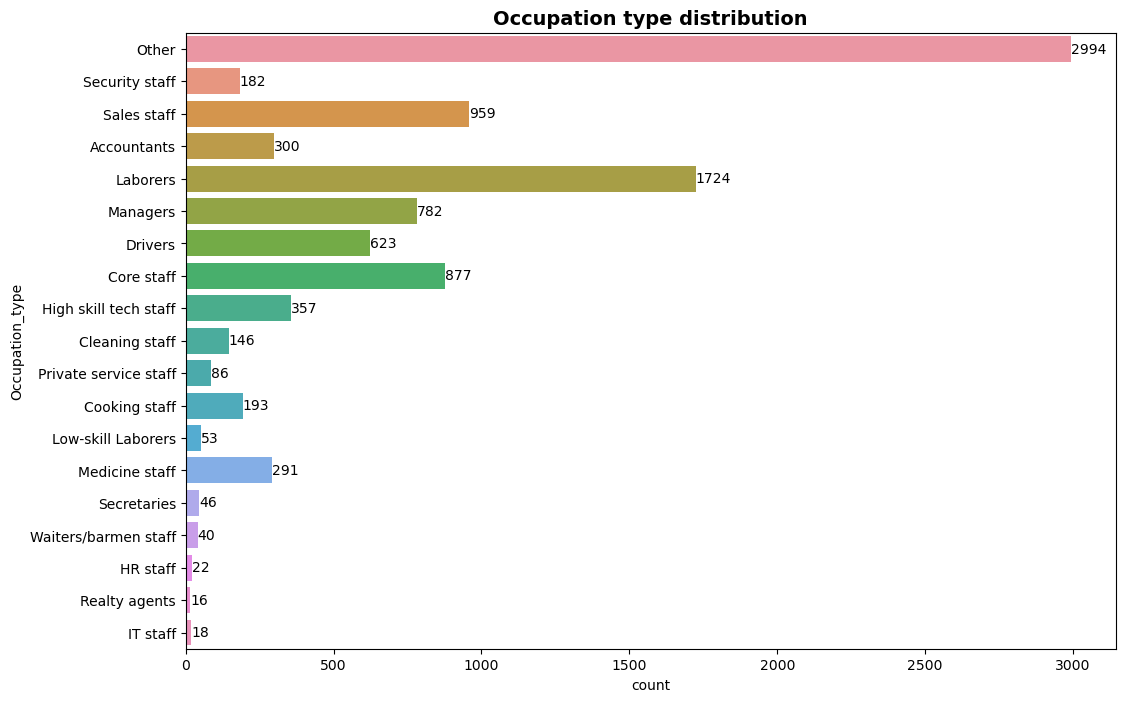

In [23]:
plt.figure(figsize=(12,8))
ax=sns.countplot(data=df, y="Occupation_type")
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Occupation type distribution", fontsize=14, fontweight="bold")
plt.show()

In [24]:
#Count the number of individuals who are eligible and not eligible for a credit card
target_counts = df['Target'].value_counts()
eligible_count = target_counts[1]
not_eligible_count = target_counts[0]
print(f"Eligible Person: {eligible_count}")
print(f"Not Eligible Person: {not_eligible_count}")

Eligible Person: 1283
Not Eligible Person: 8426


In [25]:
# the distribution of individuals based on credit card eligibility
labels = ['Eligible for Credit Card', 'Not Eligible for Credit Card']
counts = [eligible_count, not_eligible_count]

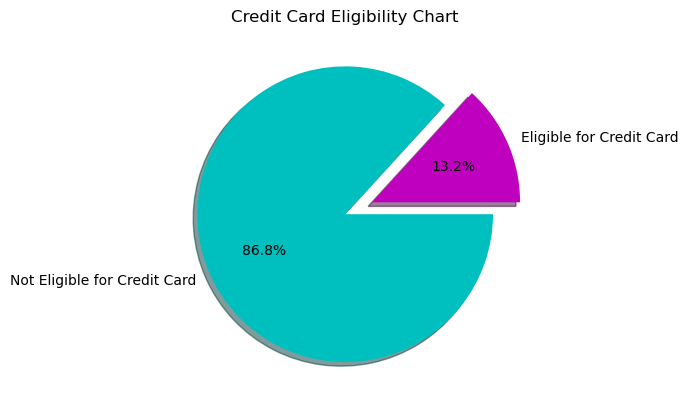

<Figure size 640x480 with 0 Axes>

In [26]:
#Number of Credit Card Eligible Persons
mycolors=['m','c']
myexplode = [0.2, 0]
plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, colors=mycolors, explode=myexplode)
plt.title('Credit Card Eligibility Chart')
plt.show()
plt.savefig("Creditcard eligibility")

In [27]:
# Convert categorical features to numerical using LabelEncoder
le=LabelEncoder()
categorical_columns=["Income_type","Education_type","Family_status","Housing_type","Occupation_type"]
for col in categorical_columns:
    df[col]= le.fit_transform(df[col])

In [28]:
df.head()

,Gender,Own_car,Own_property,Work_phone,Num_children,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,15,427500.0,32.868574,12.435574,4,1,0,4,12,1
1,1,1,1,0,0,29,112500.0,58.793815,3.104787,4,4,1,1,17,0
2,0,0,1,0,0,4,270000.0,52.321403,8.353354,0,4,3,1,15,0
3,0,0,1,0,0,20,283500.0,61.504343,0.000000,1,1,2,1,12,0
4,1,1,1,1,0,5,270000.0,46.193967,2.105450,4,1,1,1,0,0


In [29]:
## split data into train and test
X=df.drop('Target', axis=1)
y=df['Target']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [31]:
print('X Training Shape:', X_train.shape)
print('y Training Shape:', y_train.shape)
print('X Testing Shape:', X_test.shape)
print('y Testing Shape:', y_test.shape)

X Training Shape: (6796, 14)
y Training Shape: (6796,)
X Testing Shape: (2913, 14)
y Testing Shape: (2913,)


In [32]:
model1=LogisticRegression()
model1

LogisticRegression()

In [33]:
model1.fit(X_train,y_train)

LogisticRegression()

In [34]:
model1.intercept_

array([-0.00059213])

In [35]:
model1.coef_

array([[-5.22780415e-05, -9.72473325e-05, -4.76500334e-04,
        -1.64165046e-04, -1.62420905e-04, -1.00267886e-02,
        -1.29355265e-06, -2.92981404e-02, -2.72467399e-03,
        -1.48084235e-03, -2.29465879e-03, -8.04606379e-04,
        -7.05614771e-04, -6.26412981e-03]])

In [36]:
y_pred1=model1.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
cm1=confusion_matrix(y_test,y_pred1)
cm1

array([[2499,    0],
       [ 414,    0]], dtype=int64)

In [38]:
accuracy1=accuracy_score(y_test,y_pred1)
precision1=precision_score(y_test,y_pred1)
recall1=recall_score(y_test,y_pred1)
f1_1=f1_score(y_test,y_pred1)

In [39]:
# Print the results
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f1_1)

Accuracy: 0.8578784757981462
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


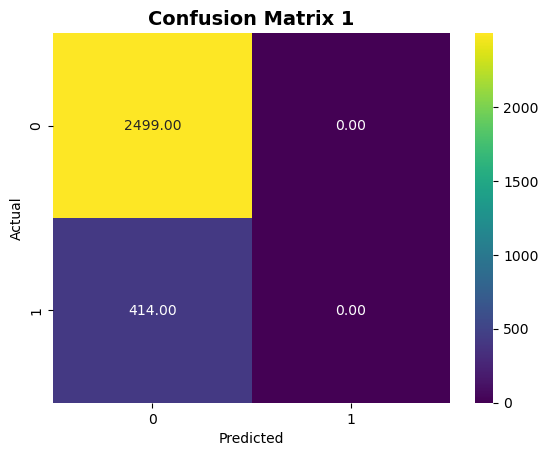

<Figure size 640x480 with 0 Axes>

In [40]:
# plot the confusion matrix
sns.heatmap(cm1, annot=True,  fmt=".2f", cmap="viridis" )
plt.title("Confusion Matrix 1", fontsize=14, fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
plt.savefig("confusion matrix")

In [41]:
## Decision Tree
model2=DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
y_pred2=model2.predict(X_test)
y_pred2

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [43]:
# Evaluating the model
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2, average='macro')
recall2 = recall_score(y_test, y_pred2, average='macro')
f1_2 = f1_score(y_test, y_pred2, average='macro')

In [44]:
# Print the results
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f1_2)

Accuracy: 0.7559217301750772
Precision: 0.5115446658920196
Recall: 0.5121193404898191
F1 Score: 0.5117496143889784


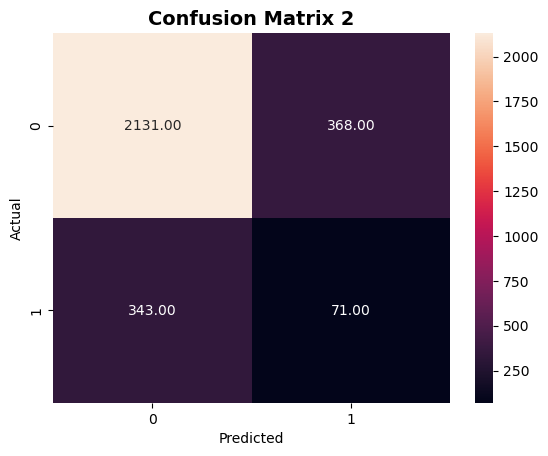

<Figure size 640x480 with 0 Axes>

In [45]:
cm2=confusion_matrix(y_test,y_pred2)
cm2
sns.heatmap(cm2, annot=True,  fmt=".2f")
plt.title("Confusion Matrix 2", fontsize=14, fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
plt.savefig("confusion matrix")

In [46]:
## support vector machine
model3=SVC()
model3.fit(X_train, y_train)

SVC()

In [47]:
y_pred3=model3.predict(X_test)

In [48]:
# Evaluating the model
accuracy3 = accuracy_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3, average='macro')
recall3 = recall_score(y_test, y_pred3, average='macro')
f1_3 = f1_score(y_test, y_pred3, average='macro')

In [49]:
# Print the results
print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Recall:", recall3)
print("F1 Score:", f1_3)

Accuracy: 0.8578784757981462
Precision: 0.4289392378990731
Recall: 0.5
F1 Score: 0.4617516629711752


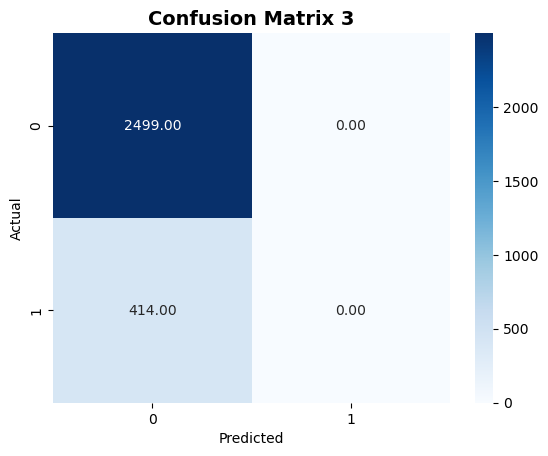

In [62]:
cm3=confusion_matrix(y_test,y_pred3)
cm3
sns.heatmap(cm3, annot=True,  fmt=".2f", cmap='Blues')
plt.title("Confusion Matrix 3", fontsize=14, fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [51]:
### Random forest classifier
model4=RandomForestClassifier(random_state=42)

In [52]:
model4.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
y_pred4=model4.predict(X_test)

In [54]:
# Evaluating the model
accuracy4 = accuracy_score(y_test, y_pred4)
precision4 = precision_score(y_test, y_pred4, average='macro')
recall4 = recall_score(y_test, y_pred4, average='macro')
f1_4 = f1_score(y_test, y_pred4, average='macro')

In [55]:
# Print the results
print("Accuracy:", accuracy4)
print("Precision:", precision4)
print("Recall:", recall4)
print("F1 Score:", f1_4)

Accuracy: 0.8565053209749399
Precision: 0.5540877796901893
Recall: 0.5012149787451212
F1 Score: 0.46606428097845726


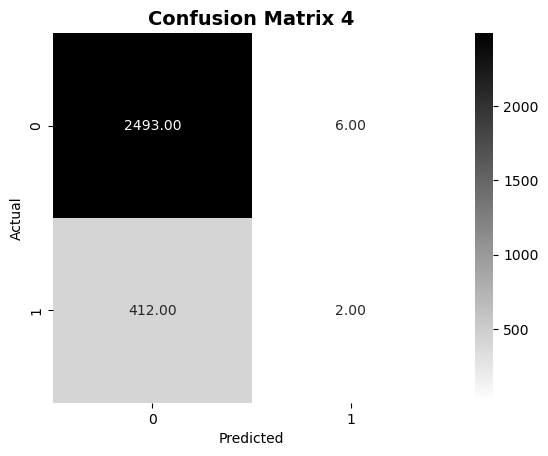

In [64]:
cm4=confusion_matrix(y_test,y_pred4)
cm4
sns.heatmap(cm4, annot=True,  fmt=".2f",  cmap="binary")
plt.title("Confusion Matrix 4", fontsize=14, fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

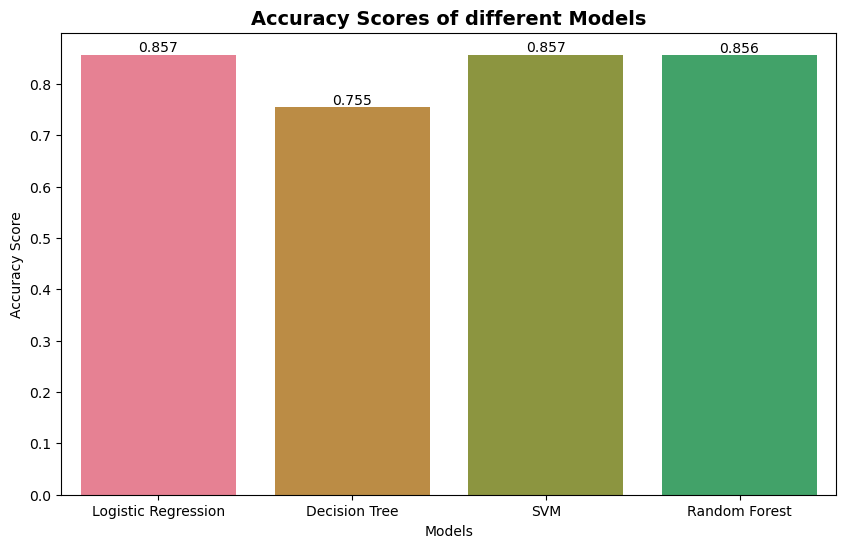

In [57]:
model_names=['Logistic Regression','Decision Tree','SVM','Random Forest']
accuracy_scores=[0.857,0.755,0.857,0.856]
plt.figure(figsize=(10,6))
ax=sns.barplot(x=model_names, y=accuracy_scores)
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Accuracy Scores of different Models", fontsize=14, fontweight='bold')
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.show()


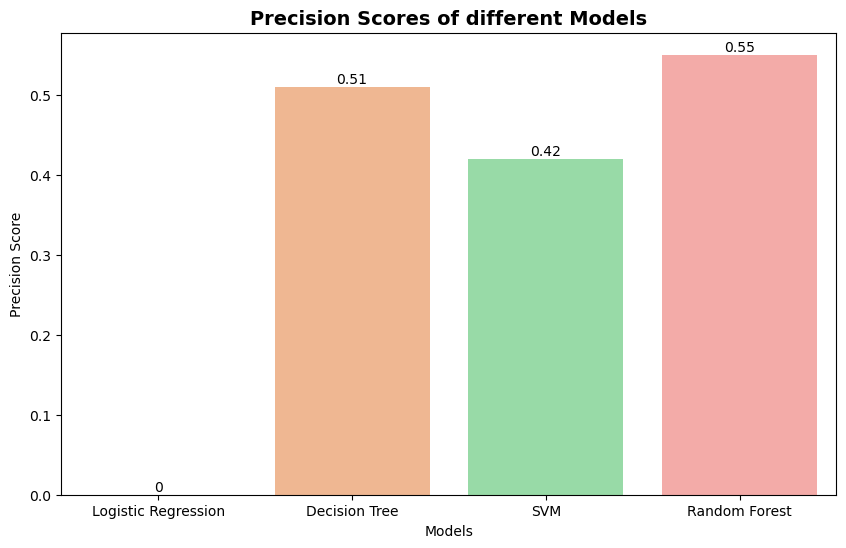

In [58]:
model_names=['Logistic Regression','Decision Tree','SVM','Random Forest']
precision_scores=[0.0,0.51,0.42,0.55]
plt.figure(figsize=(10,6))
ax=sns.barplot(x=model_names, y=precision_scores, palette='pastel')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Precision Scores of different Models", fontsize=14, fontweight='bold')
plt.xlabel("Models")
plt.ylabel("Precision Score")
plt.show()

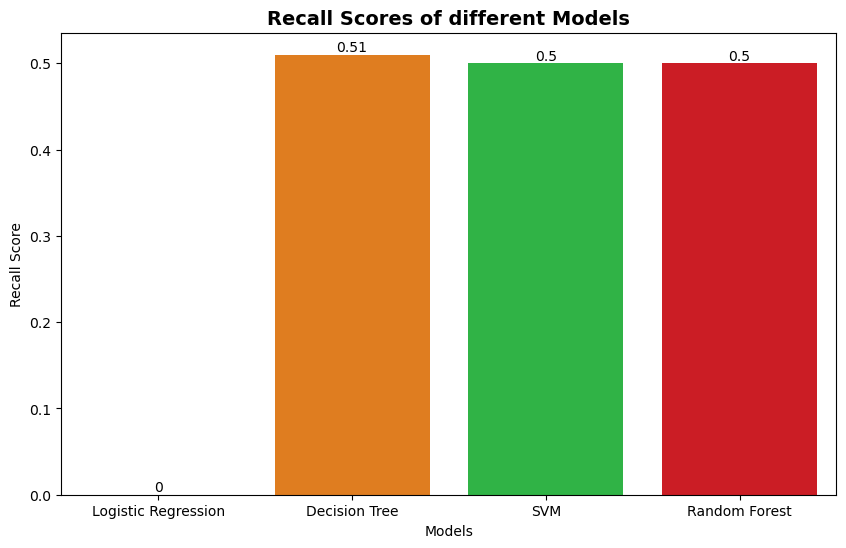

In [59]:
model_names=['Logistic Regression','Decision Tree','SVM','Random Forest']
recall_scores=[0.0,0.51,0.5,0.50]
plt.figure(figsize=(10,6))
ax=sns.barplot(x=model_names, y=recall_scores, palette='bright')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Recall Scores of different Models", fontsize=14, fontweight='bold')
plt.xlabel("Models")
plt.ylabel("Recall Score")
plt.show()

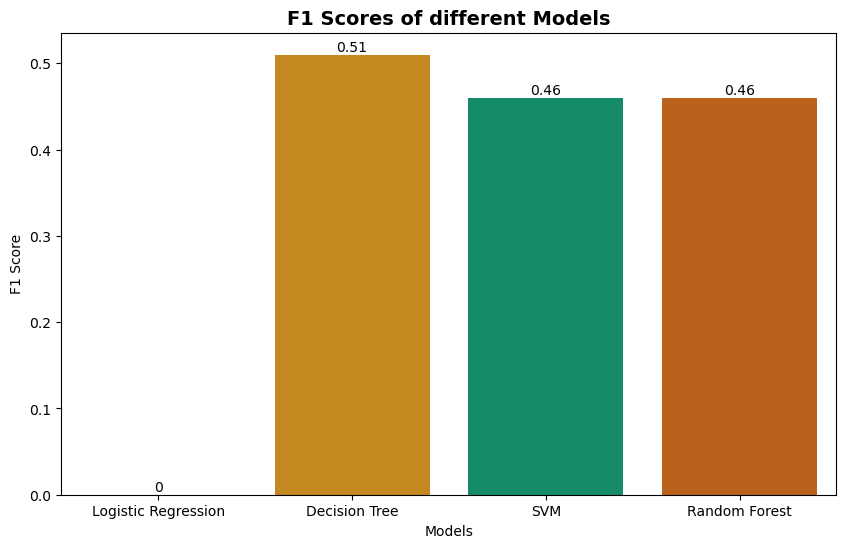

In [60]:
model_names=['Logistic Regression','Decision Tree','SVM','Random Forest']
f1_scores=[0.0,0.51,0.46,0.46]
plt.figure(figsize=(10,6))
ax=sns.barplot(x=model_names, y=f1_scores, palette='colorblind')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("F1 Scores of different Models", fontsize=14, fontweight='bold')
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.show()

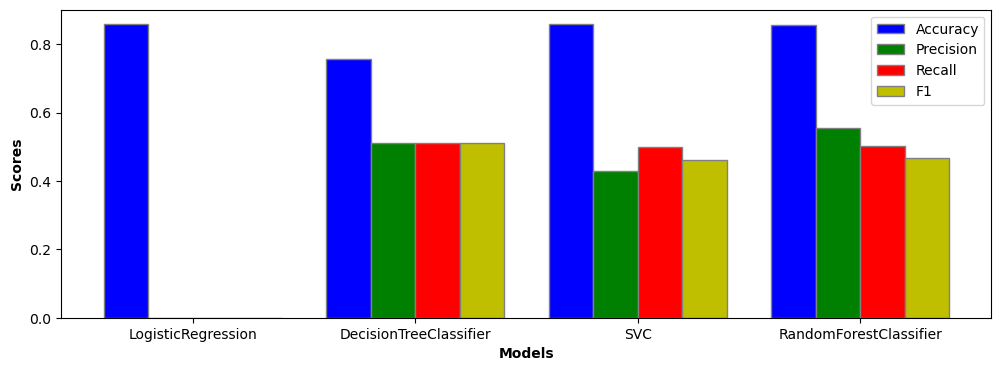

<Figure size 640x480 with 0 Axes>

In [61]:
models = ['LogisticRegression', 'DecisionTreeClassifier', 'SVC','RandomForestClassifier']
accuracy = [accuracy1, accuracy2, accuracy3,accuracy4]
precision = [precision1,precision2, precision3,precision4]
recall = [recall1, recall2, recall3,recall4]
f1 = [f1_1, f1_2, f1_3,f1_4]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the figure and the axes
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the bars for each metric
bar1 = ax.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
bar2 = ax.bar(r2, precision, color='g', width=bar_width, edgecolor='grey', label='Precision')
bar3 = ax.bar(r3, recall, color='r', width=bar_width, edgecolor='grey', label='Recall')
bar4 = ax.bar(r4, f1, color='y', width=bar_width, edgecolor='grey', label='F1')

# Add xticks on the middle of the group bars
ax.set_xlabel('Models', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_xticks([r + bar_width * 1.5 for r in range(len(models))])
ax.set_xticklabels(models)

# Add legend
ax.legend()

# Show the plot
plt.show()
plt.savefig("Accuracy scores")

# Conclusion

The dataset reveals several key insights:
There are more females than males, and 6139 individuals do not own a car.
Property ownership is slightly higher, with 6520 individuals owning property.
Most individuals have no children.
Income distribution varies widely, and the most common occupations are 'other' and 'laborers'.
Notably, 86.8% of individuals are not eligible for a credit card, highlighting potential financial constraints within the dataset. Overall, the data suggests significant economic challenges for the majority of individuals.

Based on the evaluation metrics, the DECISION TREE model achieves balanced performance across precision, recll, and f1 scores, indicating its effective handling of both false positives and false negatives. Although Logistic regression and SVM show high accuracy, their precision and recall are notably lower, especially for Logistic regression, which yields zero scores for precision, recall, and f1. Random forest performs well with good accuracy and relatively higher precision but falls short in recall and F1 scores compared to the DECISION TREE.
Given the comprehensive balance of metrics, the Decision Tree appears to be the best model fo our project, offering robust and reliable performance.